In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
wine_df =pd.read_csv("F:\winequality-red.csv")
wine_df.shape

(1599, 12)

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Check for duplicates across all columns
duplicated = wine_df.duplicated()

# Print the number of duplicated instances
print("Number of duplicated instances:", duplicated.sum())

# Print the duplicated instances
wine_df[duplicated]

Number of duplicated instances: 240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
wine_df = wine_df.drop_duplicates()

In [7]:
# Make sure there is no more duplicates.
duplicated = wine_df.duplicated()

print("Number of duplicated instances:", duplicated.sum())
wine_df[duplicated]

Number of duplicated instances: 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


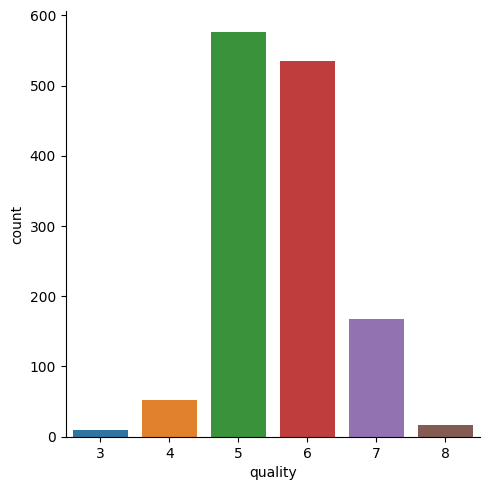

In [8]:
sns.catplot(x='quality' , data=wine_df , kind='count');

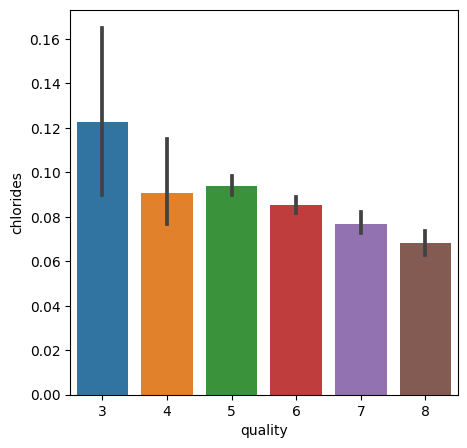

In [9]:
plt.figure(figsize=(5,5))
sns.barplot(data=wine_df , x='quality' ,y='chlorides');

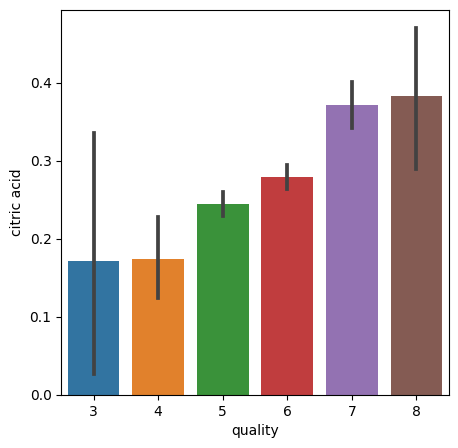

In [10]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='citric acid' , data=wine_df);

In [11]:
wine_df["quality"] = np.where(wine_df["quality"] >= 7, 1, 0)

In [12]:
wine_df['quality'].value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

Pre-processing Steps for Machine Learning

In [13]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

Splitting the data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Feature Scaling

In [15]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Handling Imbalanced

In [16]:
fig = ex.pie(y_train, names='quality')
fig.update_layout(title='<b>Qualtiy Proportion before SMOTE Upsampling<b>')
fig.show()

In [17]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(pd.Series(y_train).value_counts())

quality
1    935
0    935
Name: count, dtype: int64


In [18]:
fig = ex.pie(y_train, names='quality')
fig.update_layout(title='<b>Qualtiy Proportion after SMOTE Upsampling<b>')
fig.show()

**Decision Tree**

In [19]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.20f}")

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.82720588235294112422
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       240
           1       0.35      0.56      0.43        32

    accuracy                           0.83       272
   macro avg       0.64      0.71      0.67       272
weighted avg       0.87      0.83      0.84       272



- The Decision Tree classifier achieves an accuracy of approximately 82.7% on the test dataset. This means that the model correctly classifies roughly 82.7% of the samples. However, accuracy alone may not be the only metric to consider, especially for imbalanced datasets.

In [20]:
# Specify the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(dt, X, y, cv=cv, scoring='accuracy')
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean accuracy: {mean_score:.20f}")
print(f"Standard deviation: {std_score:.20f}")

Cross-validation scores: [0.81617647 0.84558824 0.83823529 0.88235294 0.83088235 0.84558824
 0.88235294 0.80882353 0.84558824 0.86666667]
Mean accuracy: 0.84622549019607851140
Standard deviation: 0.02372878157367471277


- Mean Accuracy and Standard Deviation of the cross-validation scores. The mean accuracy is approximately 84.6%, and the standard deviation is around 2.37%. The mean accuracy provides an estimate of how well the model is expected to perform on unseen data, and the standard deviation gives insights into the variability of model performance across different folds.

- The model's performance is consistent across different cross-validation folds, as indicated by the modest standard deviation in the cross-validation scores.

**Random Forest**

In [21]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.20f}")

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.86764705882352943789
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       240
           1       0.46      0.72      0.56        32

    accuracy                           0.87       272
   macro avg       0.71      0.80      0.74       272
weighted avg       0.90      0.87      0.88       272



- The Random Forest classifier achieves an accuracy of approximately 86.8% on the test dataset. This indicates that the model correctly classifies around 86.8% of the samples.

- The classification report offers more detailed insights into the model's performance, including metrics like precision, recall, and F1-score.

- For class 0 (the majority class), the model exhibits high precision (96%) and recall (89%), resulting in a high F1-score (92%). These metrics suggest that the model performs well in correctly classifying samples of class 0.

-For class 1 (the minority class), precision (46%), recall (72%), and F1-score (56%) are lower compared to class 0. While there is an improvement in recall compared to the Decision Tree model, indicating that the model identifies more positive samples, precision is still relatively low.

- Similar to the Decision Tree model, the Random Forest model is subjected to stratified k-fold cross-validation (k=10). The cross-validation scores show how the model performs on different data subsets.

In [22]:
# Specify the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean accuracy: {mean_score:.20f}")
print(f"Standard deviation: {std_score:.20f}")

Cross-validation scores: [0.88235294 0.89705882 0.91911765 0.89705882 0.90441176 0.88235294
 0.86764706 0.86029412 0.86029412 0.8962963 ]
Mean accuracy: 0.88668845315904132320
Standard deviation: 0.01861896378143573783


- Similar to the Decision Tree model, the Random Forest model is subjected to stratified k-fold cross-validation (k=10). The cross-validation scores show how the model performs on different data subsets.

- Mean Accuracy and Standard Deviation: The mean accuracy of the Random Forest model, obtained through cross-validation, is approximately 88.7%. The standard deviation is around 1.86%, indicating a relatively low level of variability in model performance across different folds.

In [23]:
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Best Accuracy: 0.9272727272727271


- The code employs a grid search to find the best combination of hyperparameters for the Random Forest model. The parameters considered are the number of estimators (trees) and the maximum depth of the trees. The best combination is found to be 100 estimators with a maximum depth of 20.

- The best cross-validated accuracy achieved through hyperparameter tuning is approximately 92.7%. This reflects the model's performance when using the best parameter settings.

Clustering

In [41]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

In [39]:
# Standardize the features
sc = StandardScaler()
X = sc.fit_transform(X)

# Apply K-Means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
wine_df['cluster'] = kmeans.fit_predict(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier on the clustered data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the Decision Tree model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.20f}")

# Train a Random Forest classifier on the clustered data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model's accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.20f}")

Decision Tree Accuracy: 0.88235294117647056211
Random Forest Accuracy: 0.89705882352941179736


The accurary highly improved when K-Means combine with Decision Tree than Random Forest, a few possible reasons for the observed behavior:

- K-Means clustering aims to group data points into clusters based on their similarities. 

- Use Decision Trees, which can create decision boundaries that follow the clusters, it might work well because it aligns with the cluster structure.

- On the other hand, Random Forests might capture different aspects of the data and might not align perfectly with the clusters created by K-Means. This can lead to a decrease in accuracy if the clustering doesn't correspond well with the true class labels.

- Decision Trees and Random Forests are capable of feature selection and might adapt to the K-Means clustering results differently. RF typically uses random subsets of features for each tree in the forest, which can affect the way it leverages clustering information.

- The Random Forest, with more trees, may learn a more complex decision boundary, which can be both an advantage and a disadvantage depending on the data and the quality of the clusters.

In [38]:
# Apply Hierarchical Agglomerative Clustering (HAC)
n_clusters = 2
hac = AgglomerativeClustering(n_clusters=n_clusters)
wine_df['cluster'] = hac.fit_predict(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier on the clustered data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the Decision Tree model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.20f}")

# Train a Random Forest classifier on the clustered data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model's accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.20f}")

Decision Tree Accuracy: 0.88235294117647056211
Random Forest Accuracy: 0.89705882352941179736


HAC and K-Means have almost the same accuracy:

- HAC (Hierarchical Agglomerative Clustering) and K-Means are both clustering algorithms used to group data points into clusters based on their similarity.

- The wine dataset may not have a very complex structure, and the clusters created by HAC and K-Means may be somewhat similar. In simpler datasets, both clustering algorithms can perform similarly.

- A small number of clusters (2) in both HAC and K-Means. When the number of clusters is limited, it's more likely that the clusters formed by both algorithms will be relatively similar.

- The Decision Tree and Random Forest classifiers are robust and can handle some degree of noise and misclassification. As long as the clusters provide some degree of separation between the classes, these models can still perform well.

In [37]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
wine_df['cluster'] = dbscan.fit_predict(X)

# The 'cluster' column in 'wine_df' will contain cluster labels for each data point

# Split the data into train and test sets based on the cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=wine_df['cluster'])

# Train a Decision Tree classifier on the clustered data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the Decision Tree model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.20f}")

# Train a Random Forest classifier on the clustered data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the Random Forest model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.20f}")

Decision Tree Accuracy: 0.84926470588235292158
Random Forest Accuracy: 0.90441176470588235947


The accuracy with DBSCAN is little higher than HAC and K-Means, some reason for this:

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) has a more flexible approach to cluster formation, as it identifies clusters based on the density of data points. Data points that are close to each other are considered part of the same cluster if they meet certain density criteria.

- HAC (Hierarchical Agglomerative Clustering) and K-Means, on the other hand, require to specify the number of clusters in advance. Additionally, HAC creates a hierarchy of clusters, and the choice of the linkage method and distance metric can affect the cluster structures. 

- The differences in the algorithms and their flexibility can lead to variations in the clustering results, which, in turn, influence the performance of the classifiers trained on the clustered data. In this case, it appears that DBSCAN may have formed clusters that are more suitable for the Decision Tree and Random Forest classifiers, resulting in slightly higher accuracy.

In [43]:
# Apply Mean Shift clustering
clusterer = MeanShift()
wine_df['cluster'] = clusterer.fit_predict(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier on the clustered data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, wine_df.loc[y_train.index]['cluster'])
y_pred = rf.predict(X_test)

# Evaluate the Random Forest model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy with Mean Shift: {accuracy:.20f}")

# Train a Decision Tree classifier on the clustered data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, wine_df.loc[y_train.index]['cluster'])
y_pred = dt.predict(X_test)

# Evaluate the Decision Tree model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy with Mean Shift: {accuracy:.20f}")

Random Forest Accuracy with Mean Shift: 0.85661764705882348370
Decision Tree Accuracy with Mean Shift: 0.85294117647058820264


Mean Shift accuracy RF and DT is almost similar and both accuracy lower than K-Means, HAC and DBSCAN

- Mean Shift is a density-based algorithm that may not partition the data as cleanly. This can lead to different quality clusters and subsequently affect the classification accuracy.

- Training RF and DT classifiers on the cluster labels. If the cluster labels assigned by Mean Shift are less informative or less separable, it can result in lower accuracy for both RF and DT compared to K-Means, HAC, or DBSCAN.

- Clustering algorithms and classification models are sensitive to feature scaling.